In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns
matplotlib.__version__

'3.5.1'

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)

data.head()

(253680, 22)


,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [3]:
X = data.drop("Diabetes", axis = 1)
y = data["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(202944, 21) (50736, 21)


Text(0.5, 1.0, 'Distribution of Diabetes')

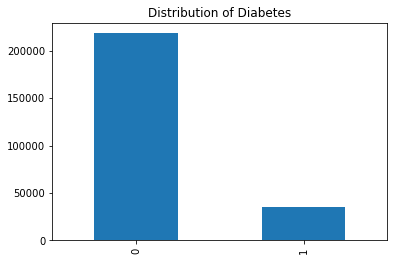

In [4]:
plt.figure()
y.value_counts().sort_index().plot.bar()
plt.title("Distribution of Diabetes")

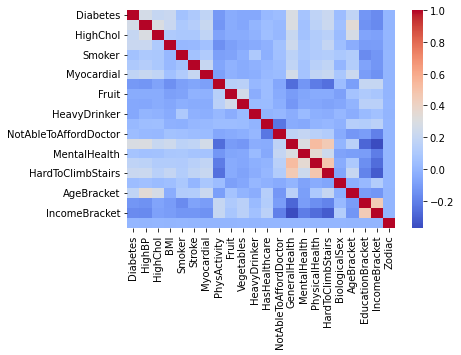

In [20]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

## Question 1

Build a logistic regression model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

AUC score:  0.8215562034523624
F1 score:  0.43938526935338834
Accuracy:  0.7296594134342479
Precision:  0.30802292263610315
Recall:  0.7661060433295325


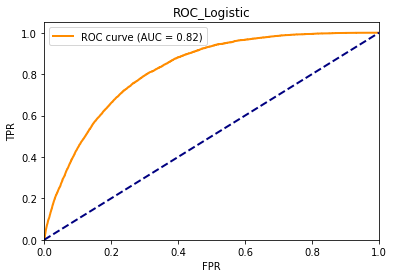

In [6]:
log = LogisticRegression(solver="saga", max_iter = 2500, class_weight="balanced")
log.fit(X_train, y_train)

y_pred_log = log.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_log)
print("AUC score: ", auc)

y_pred = log.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score: ", f1)

acc = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: ", acc)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Logistic')
plt.legend(loc="best")
plt.show()

In [7]:
result = permutation_importance(log, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
GeneralHealth: 0.009094134342478754
BMI: 0.005292100283822177
HeavyDrinker: 0.0010446231472721723
Myocardial: 0.0007154683065279221
BiologicalSex: 0.0001596499526963613
Stroke: 0.00015767896562601802
NotAbleToAffordDoctor: -5.912961210929879e-06
PhysActivity: -6.504257332070606e-05
Smoker: -8.672343109424884e-05
Zodiac: -0.00012811415957109107
HardToClimbStairs: -0.0001419110690633496
MentalHealth: -0.0002798801639861015
IncomeBracket: -0.000311415957111294
PhysicalHealth: -0.0004119362976978791
HasHealthcare: -0.0004217912330495066
Vegetables: -0.00042770419426044757
Fruit: -0.0004888047934405226
EducationBracket: -0.0005203405865657374
HighChol: -0.004921554714601051
AgeBracket: -0.007964758751182577
HighBP: -0.010097366761274018


## Question 2

Build a SVM. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

AUC score:  0.821205250956903
F1 score:  0.22840605520926088
Accuracy:  0.8633711762850835
Precision:  0.5213414634146342
Recall:  0.14623717217787913


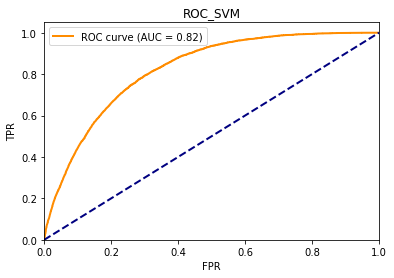

In [8]:
svm = CalibratedClassifierCV(LinearSVC(dual = False, class_weight="balanced"))
svm.fit(X_train, y_train)

y_pred_svm = svm.predict_proba(X_test)[::,1]
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm)
print("AUC score: ", auc_svm)

y_pred = svm.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score: ", f1)

acc = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: ", acc)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svm)

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_SVM')
plt.legend(loc="best")
plt.show()

In [9]:
result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
BMI: 0.005743456322926466
GeneralHealth: 0.004007016713970302
HighBP: 0.0012298959318826409
HighChol: 0.0010564490696940766
AgeBracket: 0.0007943077893408645
PhysicalHealth: 0.0006878744875433052
BiologicalSex: 0.00037251655629135796
HeavyDrinker: 0.00029367707347834895
MentalHealth: 0.0001162882371491425
HasHealthcare: 0.00011234626300847817
Fruit: 7.883948281250941e-06
Zodiac: 0.0
Stroke: -5.551115123125783e-17
NotAbleToAffordDoctor: -1.7738883632933966e-05
Smoker: -1.9709870703288336e-05
Vegetables: -6.307158625044052e-05
PhysActivity: -0.0001222011983601612
EducationBracket: -0.00025031535793127444
HardToClimbStairs: -0.00033112582781458233
IncomeBracket: -0.0004158782718385767
Myocardial: -0.000683932513402763


## Question 3

Use a single, individual decision tree. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

AUC score:  0.8089551779959752
F1 score:  0.43029912118035957
Accuracy:  0.7214601072216966
Precision:  0.3
Recall:  0.7606898517673888


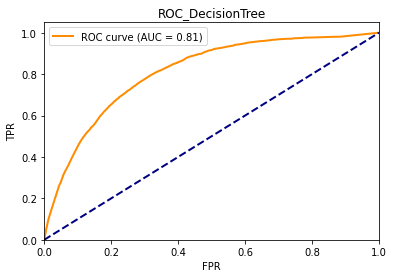

In [10]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, class_weight="balanced")
dt = dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_test)[::,1]
auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)
print("AUC score: ", auc_dt)

y_pred = dt.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score: ", f1)

acc = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: ", acc)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_DecisionTree')
plt.legend(loc="best")
plt.show()

In [11]:
result = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
GeneralHealth: 0.023470514033427946
BMI: 0.012409334594765054
AgeBracket: 0.007373462630085137
IncomeBracket: 0.0029150898770104127
HardToClimbStairs: 0.0028520182907599946
PhysicalHealth: 0.0019236833806370091
Myocardial: 0.0018744087038788937
Stroke: 0.0011766792809839166
HeavyDrinker: 0.0005183695994954273
BiologicalSex: 0.0005065436770734677
HighChol: 0.0004217912330495177
Fruit: 0.00032915484074422794
Smoker: 0.00026608325449385407
HasHealthcare: 0.00015373699148532038
PhysActivity: 0.00014979501734466716
Vegetables: 0.00010643330179754829
MentalHealth: 4.336171554712998e-05
NotAbleToAffordDoctor: 2.3651844843908253e-05
EducationBracket: -0.0001635919268369479
Zodiac: -0.0002483443708609312
HighBP: -0.003742904446546835


## Question 4

Build a random forest model. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

AUC score:  0.8255926168235511
F1 score:  0.4421243758511122
Accuracy:  0.7335422579627877
Precision:  0.31114596038798864
Recall:  0.7635404789053591


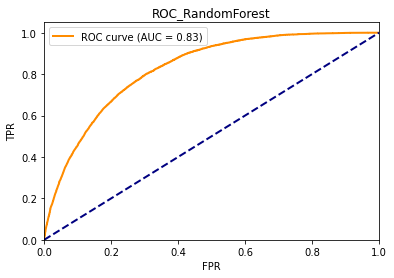

In [12]:
rf = RandomForestClassifier(max_depth=10, criterion='entropy', class_weight="balanced")
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[::,1]
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
print("AUC score: ", auc_rf)

y_pred = rf.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score: ", f1)

acc = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: ", acc)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_RandomForest')
plt.legend(loc="best")
plt.show()

In [13]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
GeneralHealth: 0.00968740145064646
BMI: 0.005739514348785823
HardToClimbStairs: 0.0015176600441500709
HeavyDrinker: 0.0007509460737937012
Myocardial: 0.0005696152633238305
MentalHealth: 0.00020892462945438784
Fruit: 0.00016950488804788887
HasHealthcare: 0.00014585304320400284
NotAbleToAffordDoctor: 5.9129612109709574e-05
Stroke: 5.5187637969056345e-05
PhysActivity: 5.5187637969056345e-05
Smoker: -2.7593818984583684e-05
Vegetables: -0.00015570797855570805
Zodiac: -0.0003863134657837164
BiologicalSex: -0.0003902554399243696
PhysicalHealth: -0.0005341374960580846
EducationBracket: -0.0008238725953958248
IncomeBracket: -0.0009421318196153105
HighChol: -0.0009815515610218095
AgeBracket: -0.003161463260801067
HighBP: -0.009165089877010446


## Question 5

Build a model using adaBoost. Doing so: What is the best predictor of diabetes and what is the AUC of this model?

AUC score:  0.8261349580908257
F1 score:  0.4427387416812967
Accuracy:  0.7309799747713654
Precision:  0.3102363105796189
Recall:  0.7728050171037628


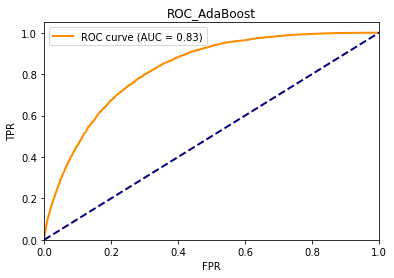

In [14]:
bdt = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1, class_weight="balanced"))
bdt.fit(X_train, y_train)

y_pred_bdt = bdt.predict_proba(X_test)[::,1]
auc_bdt = metrics.roc_auc_score(y_test, y_pred_bdt)
print("AUC score: ", auc_bdt)

y_pred = bdt.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score: ", f1)

acc = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: ", acc)

precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_bdt)

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_AdaBoost')
plt.legend(loc="best")
plt.show()

In [15]:
result = permutation_importance(bdt, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
BMI: 0.006484547461368595
GeneralHealth: 0.004269157994323503
HeavyDrinker: 0.0011412015137180153
Myocardial: 0.0005676442762534761
EducationBracket: 0.00020892462945438784
HardToClimbStairs: 0.00017541784925886316
BiologicalSex: 0.00015373699148528707
HasHealthcare: 8.869441816458101e-05
Stroke: 1.379690949222523e-05
MentalHealth: 7.883948281250941e-06
Fruit: 0.0
Smoker: 0.0
PhysActivity: 0.0
Zodiac: 0.0
Vegetables: 0.0
NotAbleToAffordDoctor: 0.0
PhysicalHealth: 0.0
IncomeBracket: -0.0003823714916430632
HighChol: -0.003196941028066913
AgeBracket: -0.0036758908861558416
HighBP: -0.007529170608640867


## Extra Credit 1

Which of these 5 models is the best to predict diabetes in this dataset?

adaBoost is the best model among the 5 models to predict diabetes in this dataset

## Extra Credit 2

Tell us something interesting about this dataset that is not already covered by the
questions above and that is not obvious.

In [16]:
numerical = ['BMI', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
categorical = [x for x in data.columns if x not in numerical]

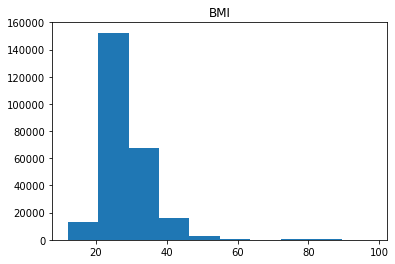

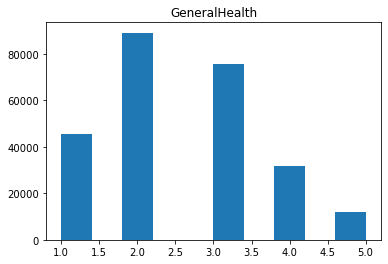

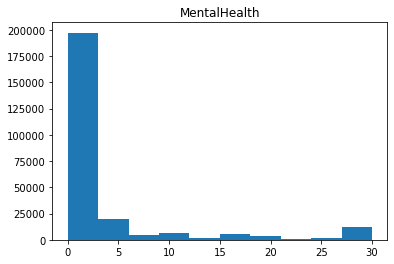

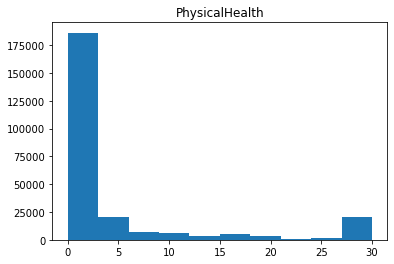

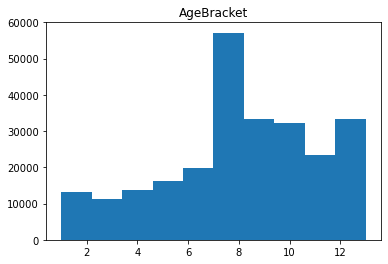

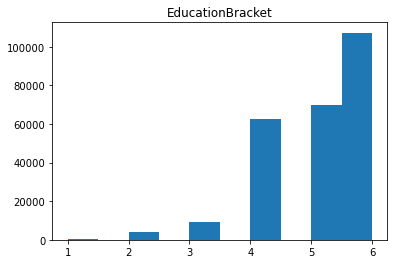

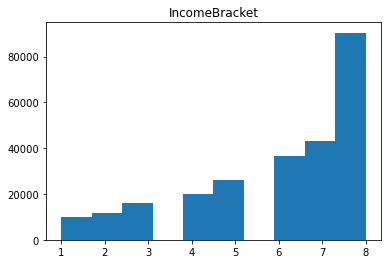

In [17]:
for var in numerical:
    plt.hist(data[var])
    plt.title(var)
    plt.show()

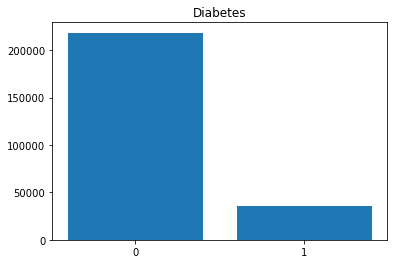

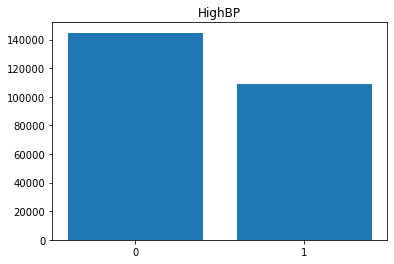

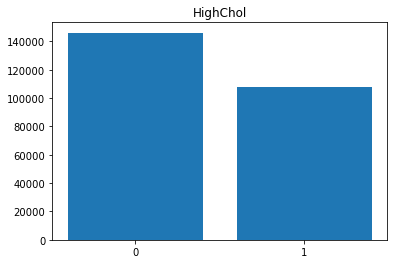

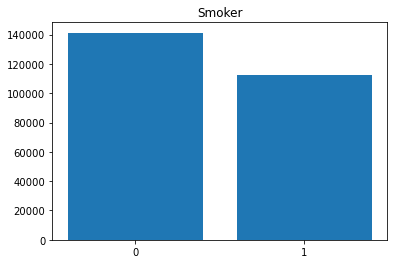

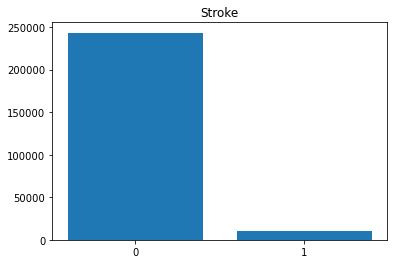

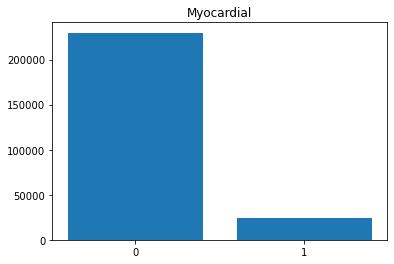

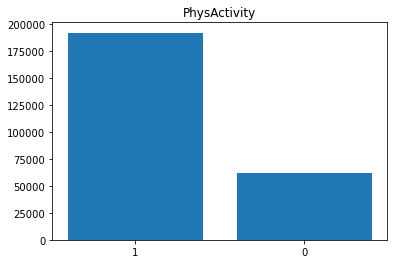

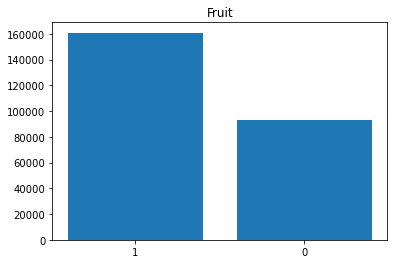

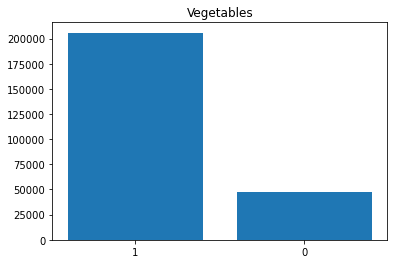

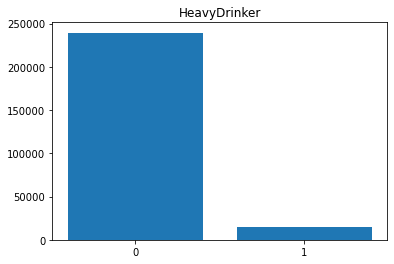

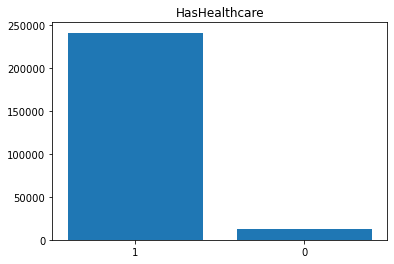

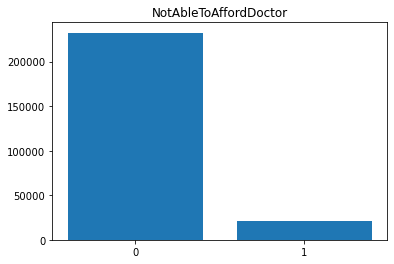

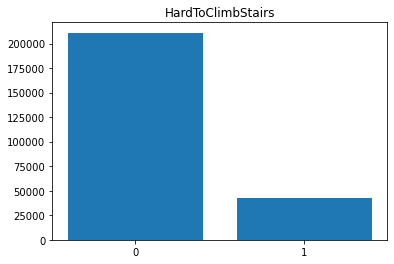

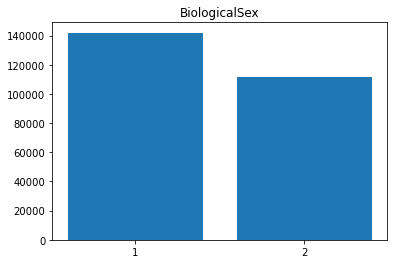

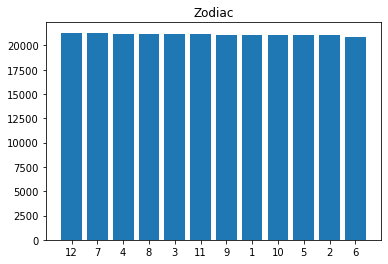

In [18]:
for var in categorical:
    s = data[var].astype('string')
    plt.bar(x=s.value_counts().index, height=s.value_counts().values)
    plt.title(var)
    plt.show()